<a href="https://colab.research.google.com/github/helberjf/torch-and-numpy/blob/main/Anomalias_using_torch_and_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Axes: ylabel='Density'>

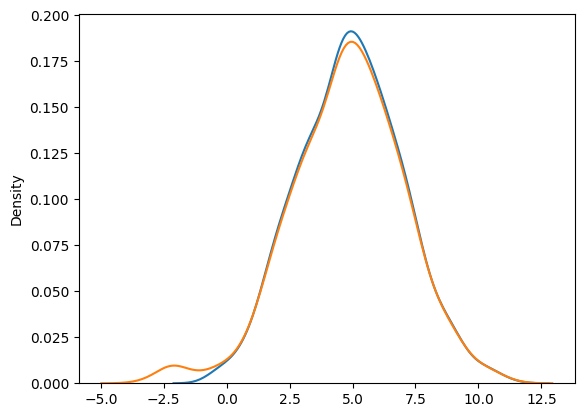

In [ ]:
import numpy as np
import torch

import matplotlib.pyplot as plt
import seaborn as sns

mu = 5.0
std = 2

N = 1000
x = torch.randn(N)*std + mu

anomaly = torch.randn(20)*0.5 + -2

sns.kdeplot(x)

x = torch.cat((x, anomaly),dim=0)

sns.kdeplot(x)

In [ ]:
m, s = x.mean(), x.std()
x_model = torch.randn(100000)*s + m


<Axes: ylabel='Density'>

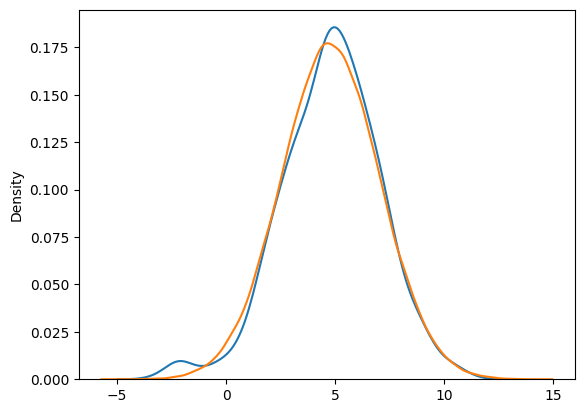

In [ ]:
sns.kdeplot(x, label='data')
sns.kdeplot(x_model, label='Gaussian')


frequencia observacional de anomalias:0.0196078431372549
tensor([-6.3715e+00, -5.4528e+00, -5.4101e+00,  ..., -3.3051e-06,
        -3.2517e-06, -1.0597e-06])


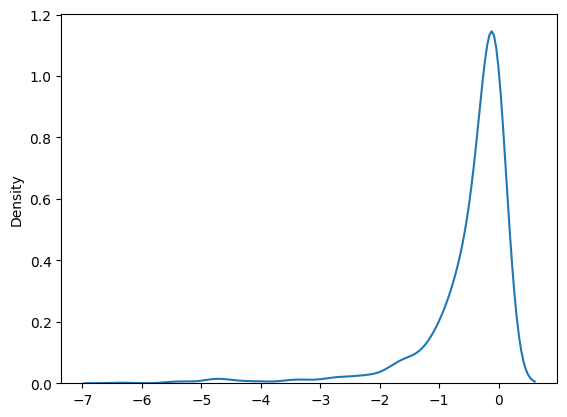

In [ ]:
print(f'frequencia observacional de anomalias:{20.0/(N+20.0)}')

log_pdf = -0.5*((x - m)**2)/(s**2)

sns.kdeplot(log_pdf)

print(log_pdf.sort()[0])


# Cancer

In [ ]:
sorted_pdfs = log_pdf.sort()[0]
print(sorted_pdfs.shape)
print(sorted_pdfs[20])

torch.Size([1020])
tensor(-3.4218)


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.mixture import GaussianMixture

data = load_breast_cancer()


In [ ]:
x, y = data.data, data.target
xcancer = x[(y == 1),:]
xbeni = x[y==0,:]

xcancer_novo = xcancer[50:,:]

xcancer = xcancer[:50,:]

x = np.concatenate((xcancer, xbeni), axis=0)

K=20

gm = GaussianMixture(n_components=K, random_state=0).fit(x)

scores = gm.score_samples(x)

#  gm.score_samples

<Axes: ylabel='Density'>

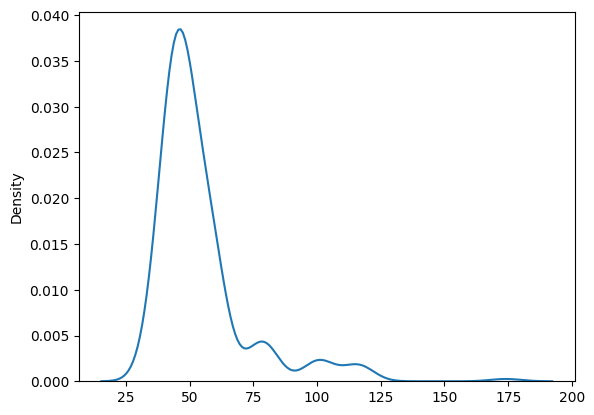

In [ ]:
sns.kdeplot(scores)

In [ ]:
print(torch.tensor(scores).sort()[0][13])

tensor(53.1308, dtype=torch.float64)


In [ ]:
scores_cancer = gm.score_samples(xcancer_novo)
torch.tensor(scores_cancer).sort()[0][260]

tensor(7.4140, dtype=torch.float64)

In [ ]:
xcancer_novo.shape

(307, 30)